# Regressão linear múltipla

Regressão linear múltipla possui a mesma lógica da regressão linear simples, diferenciando-se somente no número de variáveis independentes.

Uma regressão linear múltipla possui múltiplas variáveis independentes $x$, i.e., $x_1, x_2,$... Assim, podemos representar a equação que prevê o valor de $y$ em função de cada $x_i$ como:
$$y=\alpha_1 x_1 + \alpha_2 x_2 +\cdots \alpha_n x_n + \beta$$

Para exemplificar, considere os dados $y$ seguindo um comportamento linear dependente de $x1$ e $x2$ segundo a função linear: $$y = 2x_1-x_2-1 + \epsilon$$, onde $\epsilon$ é o ruído. A função linear que prevê valores de $y$ é dada por $$\hat{y} = 2x_1-x_2-1$$.

O resultado é um gráfico de três dimensões:

Text(0.5, 0, 'y')

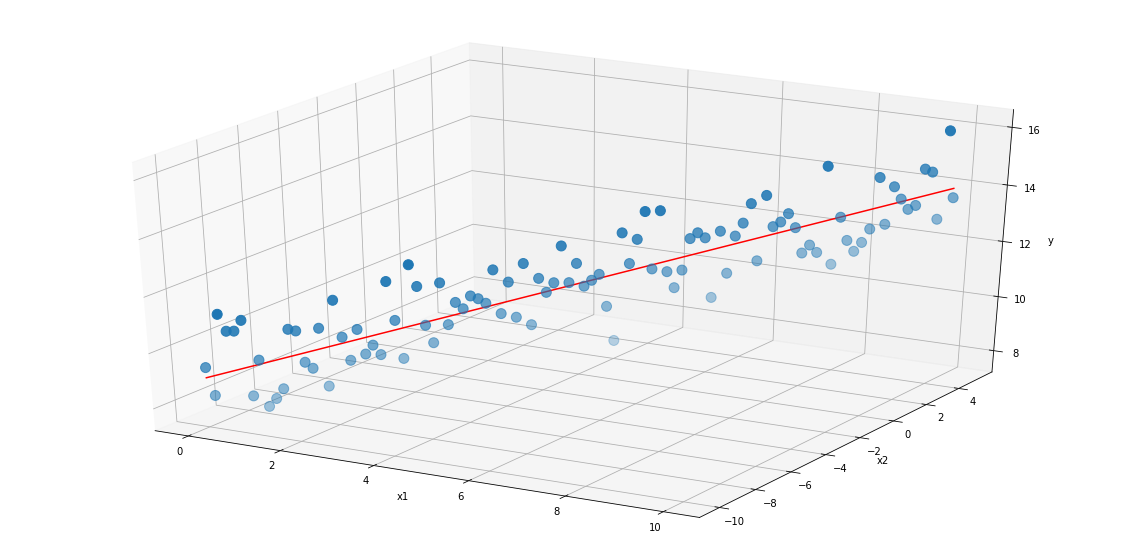

In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import random


fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')

x1 = np.linspace(0, 10, 100)
x2 = np.linspace(-10, 5, 100)
y = [2 * i - j - 1 + random.normalvariate(mu=0, sigma=1) 
     for i, j in zip(x1, x2)]
y_ = [2 * i - j - 1 for i, j in zip(x1, x2)]

ax.scatter(x1, x2, y, s=100)
ax.plot(x1, x2, y_, c='r')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

Para funções com mais de duas variáveis independentes não seria mais possível avaliar de maneira visual a qualidade da regressão, restando somente o valor do erro médio quadrático "score()" como medida de desempenho.

No exemplo das casas, podemos criar um modelo de regressão múltipla para prever o valor do preço dos imóveis em função da área contruída e a distância até o aeroporto.

In [18]:
import pandas as pd
housing = pd.read_csv('housing_ok.csv')

In [10]:
from sklearn.linear_model import LinearRegression

In [19]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3021 entries, 0 to 3020
Data columns (total 14 columns):
bairro                 3021 non-null object
endereco               3021 non-null object
quartos                3021 non-null float64
tipo                   3021 non-null object
preco                  3021 non-null float64
distancia_aeroporto    3021 non-null float64
cep                    3021 non-null float64
banheiros              3021 non-null float64
vagas                  3021 non-null float64
area_terreno           3021 non-null float64
area_construida        3021 non-null float64
ano_construcao         3021 non-null float64
latitude               3021 non-null float64
longitude              3021 non-null float64
dtypes: float64(11), object(3)
memory usage: 330.5+ KB


In [72]:
X = housing[['area_construida', 'distancia_aeroporto']].values
y = housing.preco.values

In [73]:
reg = LinearRegression().fit(X, y)

In [74]:
reg.score(X, y)

0.31529444099120707

Text(0.5, 0.92, 'Regressão linear múltipla')

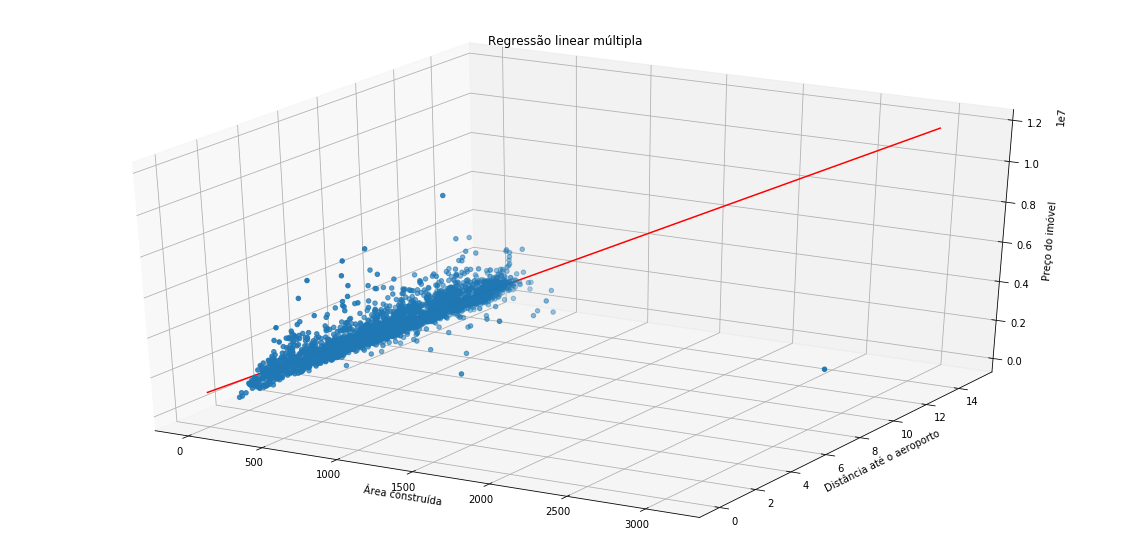

In [77]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')

x1 = list(np.linspace(0, 3000, 1000))
x2 = list(np.linspace(0, 15, 1000))
X_ = np.array([[i, j] for i, j in zip(x1, x2)])
ax.scatter(housing.area_construida, housing.distancia_aeroporto, 
           housing.preco, s=20)
ax.plot(x1, x2, reg.predict(X_), c='r')
ax.set_xlabel('Área construída')
ax.set_ylabel('Distância até o aeroporto')
ax.set_zlabel('Preço do imóvel')
plt.title('Regressão linear múltipla')